# Genie clinical data

## Setup

Loading packages

In [1]:
library("ggplot2")
library("dplyr")

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Get data

In [2]:
patient_data <- read.table("../../data/genie_v15/data_clinical_patient.txt", sep="\t", quote="", head=TRUE)
sample_data <- read.table("../../data/genie_v15/data_clinical_sample.txt", sep="\t", quote="", head=TRUE)

We start by examining the patient_data.

In [3]:
#number of rows and columnd
dim(patient_data)
# number of unique patient id
length(unique(patient_data$PATIENT_ID))

head(patient_data)

[1] 172005     10

[1] 172005

,PATIENT_ID,SEX,PRIMARY_RACE,ETHNICITY,CENTER,INT_CONTACT,INT_DOD,YEAR_CONTACT,DEAD,YEAR_DEATH
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GENIE-VICC-101416,Female,White,Non-Spanish/non-Hispanic,VICC,19225,Not Applicable,2014,False,Not Applicable
2,GENIE-VICC-102225,Female,White,Non-Spanish/non-Hispanic,VICC,12057,12487,2015,True,2017
3,GENIE-VICC-102424,Female,White,Non-Spanish/non-Hispanic,VICC,23505,23625,2016,True,2016
4,GENIE-VICC-102966,Male,White,Non-Spanish/non-Hispanic,VICC,23426,23430,2015,True,2015
5,GENIE-VICC-103244,Female,Unknown,Unknown,VICC,18267,18311,2014,True,2014
6,GENIE-VICC-103477,Male,Unknown,Non-Spanish/non-Hispanic,VICC,14626,14646,2014,True,2014


Then we can examine the sample data.

In [4]:
#number of rows and columns
dim(sample_data)
# number of unique patient id
length(unique(sample_data$SAMPLE_ID))

head(sample_data)

[1] 198041      9

[1] 198041

,PATIENT_ID,SAMPLE_ID,AGE_AT_SEQ_REPORT,ONCOTREE_CODE,SAMPLE_TYPE,SEQ_ASSAY_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_TYPE_DETAILED
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GENIE-VICC-101416,GENIE-VICC-101416-unk-1,52,MAAP,Primary,VICC-01-T7,Appendiceal Cancer,Mucinous Adenocarcinoma of the Appendix,Primary tumor
2,GENIE-VICC-102225,GENIE-VICC-102225-unk-1,31,READ,Metastasis,VICC-01-T7,Colorectal Cancer,Rectal Adenocarcinoma,Metastasis site unspecified
3,GENIE-VICC-102424,GENIE-VICC-102424-unk-1,63,SCCNOS,Metastasis,VICC-01-T7,Cancer of Unknown Primary,"Squamous Cell Carcinoma, NOS",Metastasis site unspecified
4,GENIE-VICC-102966,GENIE-VICC-102966-unk-1,64,LUAD,Metastasis,VICC-01-T7,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Metastasis site unspecified
5,GENIE-VICC-103244,GENIE-VICC-103244-unk-1,50,IDC,Primary,VICC-01-T5A,Breast Cancer,Breast Invasive Ductal Carcinoma,Primary tumor
6,GENIE-VICC-103477,GENIE-VICC-103477-unk-1,40,MRLS,Primary,VICC-01-D2,Soft Tissue Sarcoma,Myxoid/Round-Cell Liposarcoma,Primary tumor


Having everything in one table would be nice, so we merge by Patient_ID.

In [5]:
full_table <- merge(patient_data, sample_data, by='PATIENT_ID')

#number of rows
nrow(full_table)
# number of unique patient id
length(unique(full_table[["PATIENT_ID"]]))
# number of columns
ncol(full_table)

head(full_table)

[1] 198041

[1] 172005

[1] 18

,PATIENT_ID,SEX,PRIMARY_RACE,ETHNICITY,CENTER,INT_CONTACT,INT_DOD,YEAR_CONTACT,DEAD,YEAR_DEATH,SAMPLE_ID,AGE_AT_SEQ_REPORT,ONCOTREE_CODE,SAMPLE_TYPE,SEQ_ASSAY_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_TYPE_DETAILED
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GENIE-CHOP-C1002819,Female,White,Non-Spanish/non-Hispanic,CHOP,<6570,Unknown,2022,False,Unknown,GENIE-CHOP-C1002819-BS79B4V9EZ,<18,UNKNOWN,Primary,CHOP-STNGS,UNKNOWN,UNKNOWN,Primary tumor
2,GENIE-CHOP-C1002942,Female,White,Non-Spanish/non-Hispanic,CHOP,Unknown,<6570,Unknown,True,2018,GENIE-CHOP-C1002942-BS7MEH2Z48,<18,AML,Metastasis,CHOP-HEMEP,Leukemia,Acute Myeloid Leukemia,Local recurrence
3,GENIE-CHOP-C1002942,Female,White,Non-Spanish/non-Hispanic,CHOP,Unknown,<6570,Unknown,True,2018,GENIE-CHOP-C1002942-BS3YSSSEPK,<18,AML,Metastasis,CHOP-HEMEP,Leukemia,Acute Myeloid Leukemia,Local recurrence
4,GENIE-CHOP-C1003065,Male,White,Non-Spanish/non-Hispanic,CHOP,<6570,Unknown,2022,FALSE,Unknown,GENIE-CHOP-C1003065-BS66P79BWX,<18,MBL,Primary,CHOP-STNGS,Embryonal Tumor,Medulloblastoma,Primary tumor
5,GENIE-CHOP-C1003065,Male,White,Non-Spanish/non-Hispanic,CHOP,<6570,Unknown,2022,FALSE,Unknown,GENIE-CHOP-C1003065-BSTECFMMGC,<18,MBL,Primary,CHOP-STNGS,Embryonal Tumor,Medulloblastoma,Primary tumor
6,GENIE-CHOP-C1003188,Female,White,Non-Spanish/non-Hispanic,CHOP,7224,Unknown,2022,FALSE,Unknown,GENIE-CHOP-C1003188-BSHKNH1HNP,<18,MBL,Primary,CHOP-STNGS,Embryonal Tumor,Medulloblastoma,Primary tumor


In [6]:
full_table <- as.data.frame(full_table)

Now that we have the data merged, we can examine some basic aspects of the data.


 Female    Male   Other Unknown 
 104828   92313       3     897 

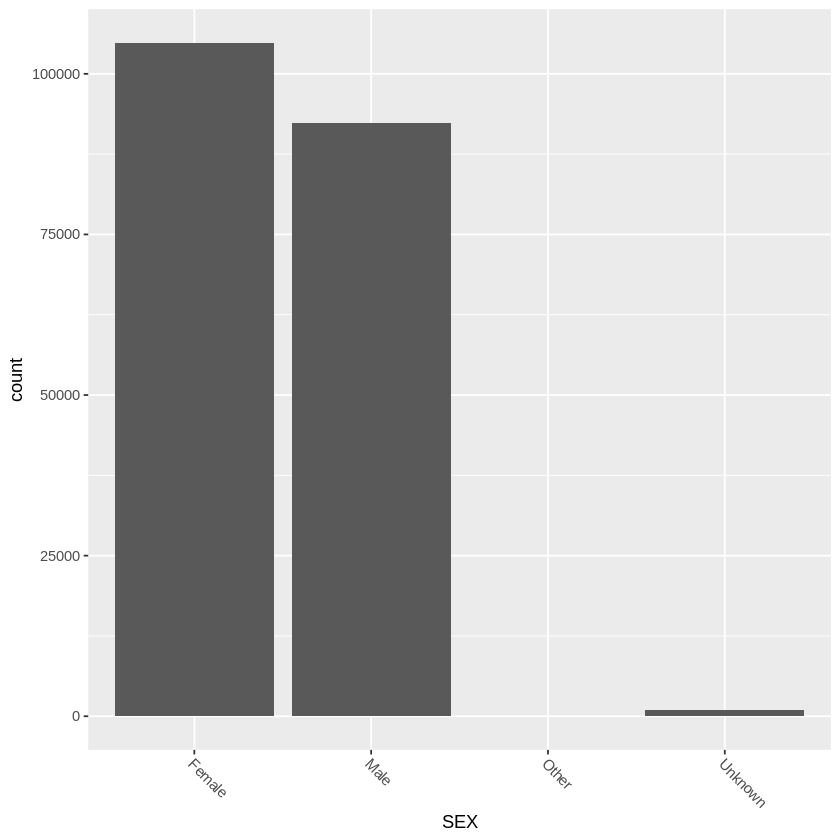

In [7]:
ggplot(full_table, aes(x=SEX)) + geom_bar() + scale_x_discrete(guide = guide_axis(angle = -45))

table(full_table$SEX)

There are around 100.000 Male and Female, and 900 Other/Unknown.


           Asian            Black  Native American   Not Applicable 
           11530            11632              382               50 
   Not Collected            Other Pacific Islander          Unknown 
            7668            10107              175            15380 
           White 
          141117 

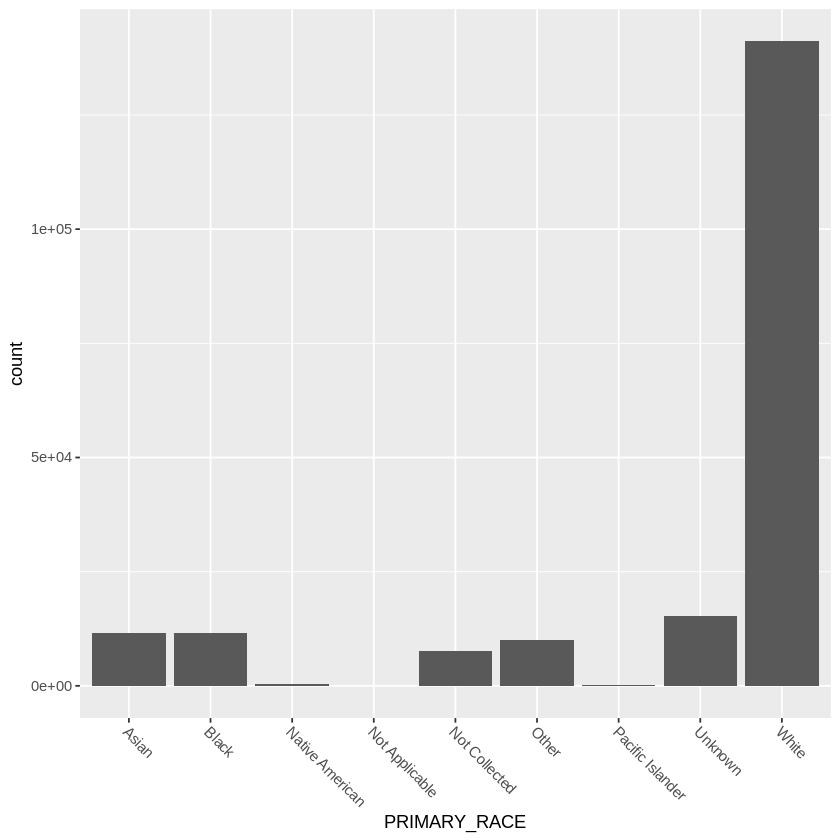

In [8]:
ggplot(full_table, aes(x=PRIMARY_RACE)) + geom_bar() + scale_x_discrete(guide = guide_axis(angle = -45))

table(full_table$PRIMARY_RACE)

The races seem to be very skewed, with a high overrepresentation of White, and many unidentified (Unkown/Other/Not Collected/Not Applicable).

* White - 141117
* Asian - 11530
* Black - 11632
* Native American - 382
* Other Pacific Islander - 175
* Unkown/Other/Not Collected/Not Applicable - 33205

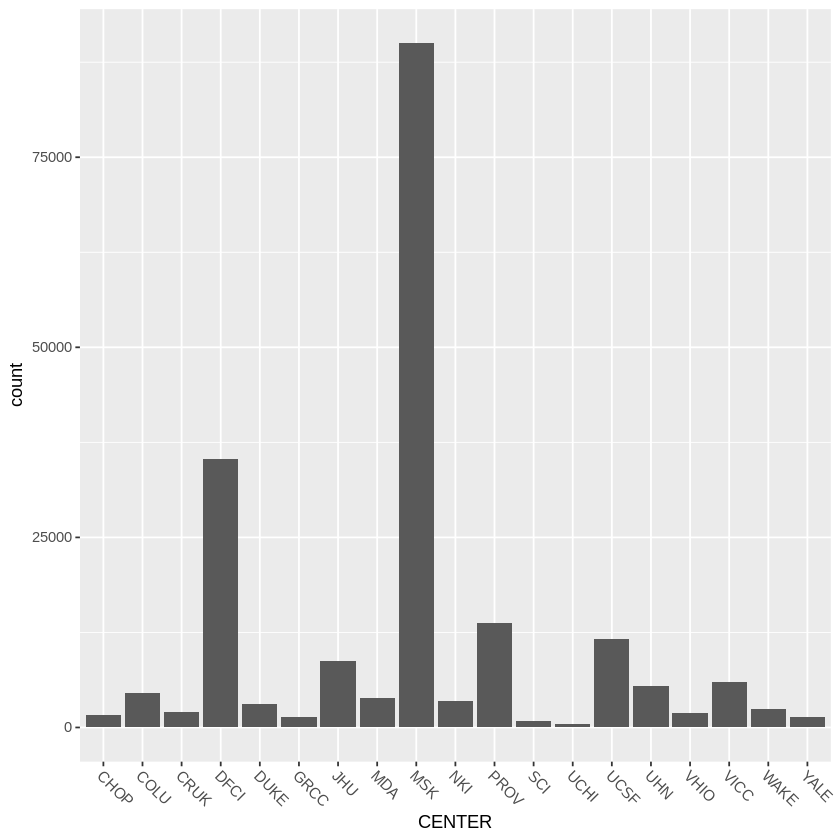

In [9]:
ggplot(full_table, aes(x=CENTER)) + geom_bar() + scale_x_discrete(guide = guide_axis(angle = -45))


                      False         FALSE Not Collected  Not Released 
         3852         51964         61212           939           502 
         True          TRUE       Unknown 
        35167         42548          1857 

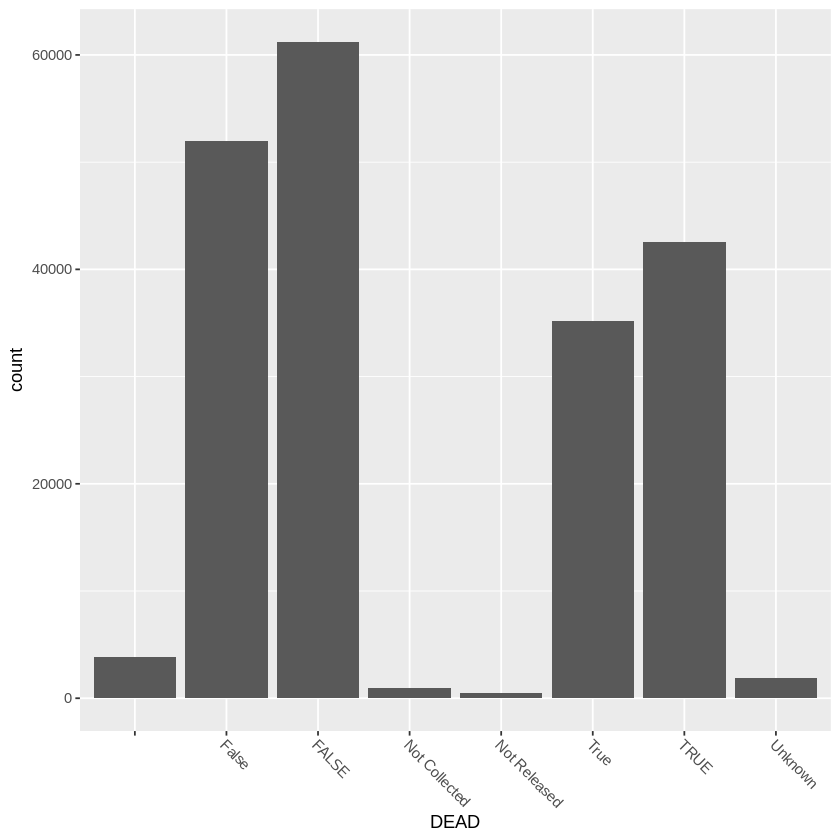

In [10]:
ggplot(full_table, aes(x=DEAD)) + geom_bar() + scale_x_discrete(guide = guide_axis(angle = -45))

table(full_table$DEAD)

This needs to be unified in True/False

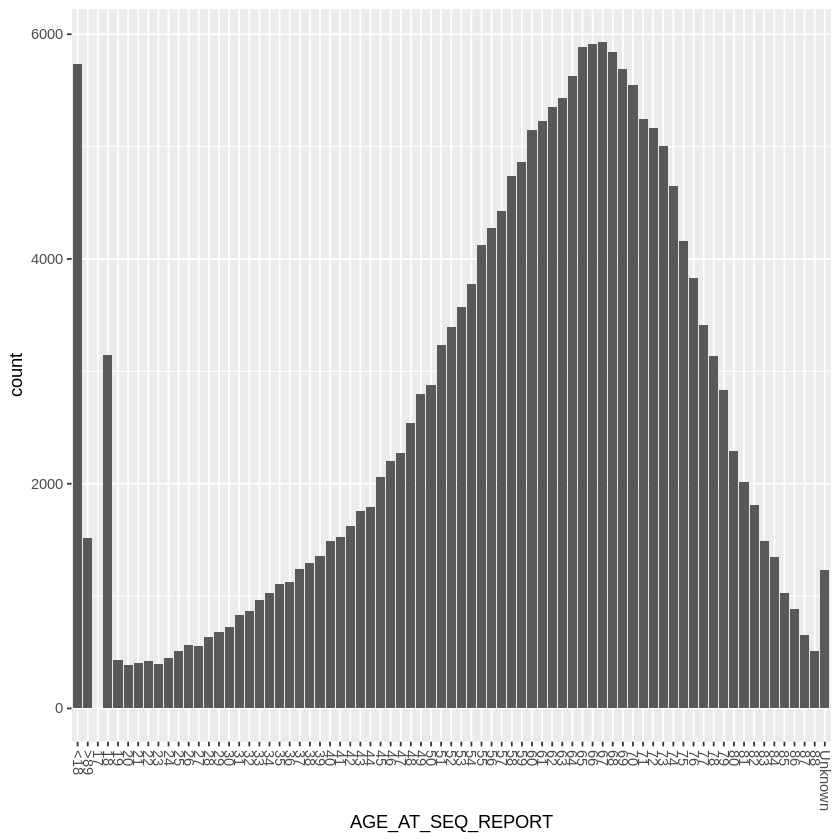

In [11]:
ggplot(full_table, aes(x=AGE_AT_SEQ_REPORT)) + geom_bar() + scale_x_discrete(guide = guide_axis(angle = -90))

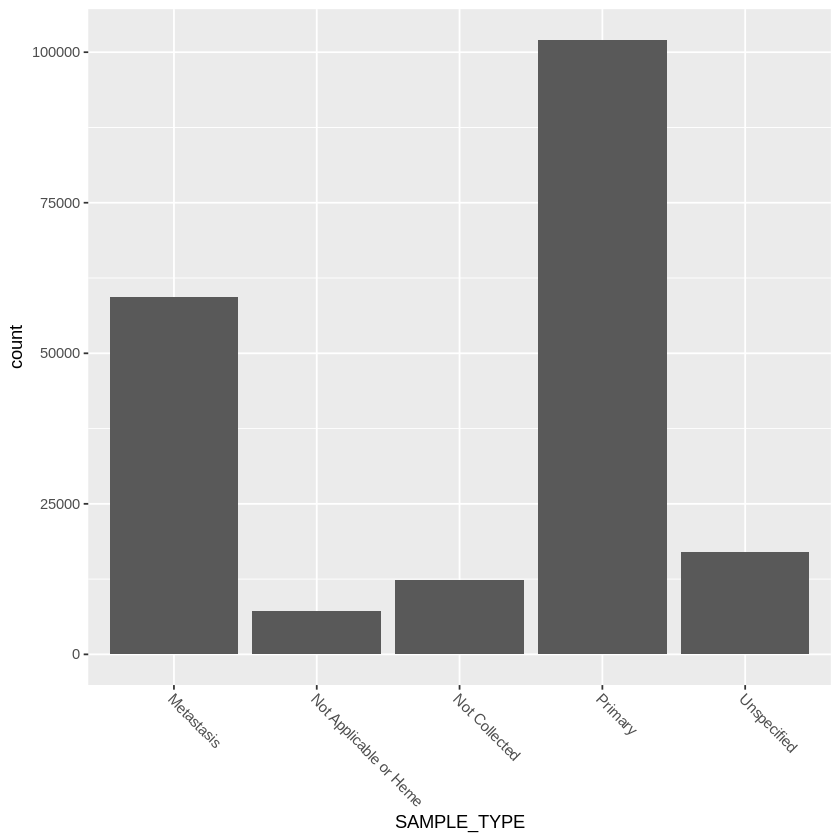

In [12]:
ggplot(full_table, aes(x=SAMPLE_TYPE)) + geom_bar() + scale_x_discrete(guide = guide_axis(angle = -45))

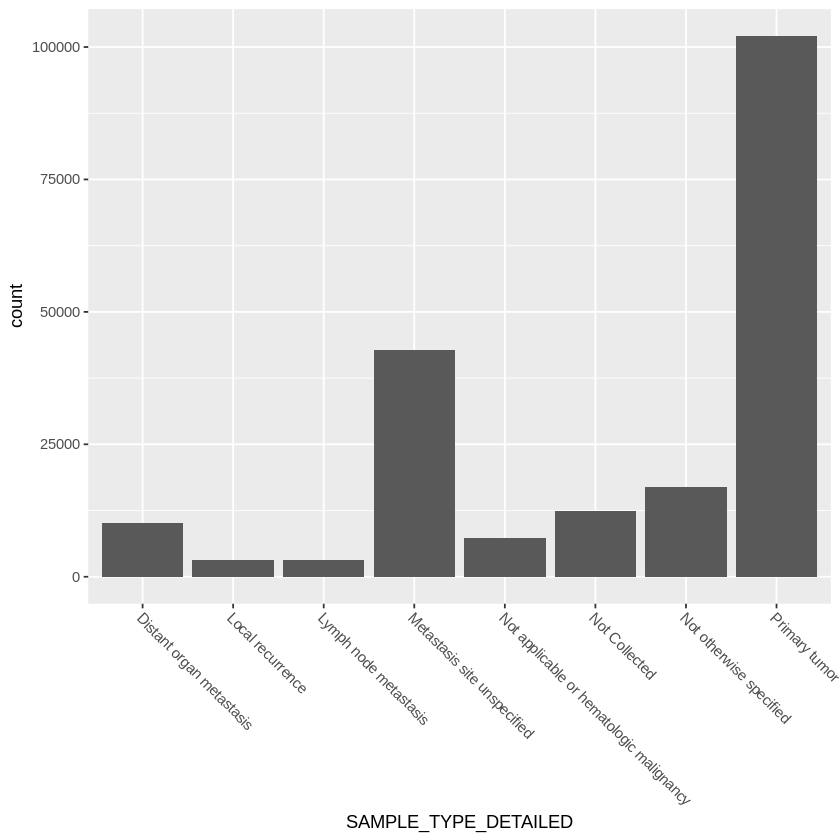

In [13]:
ggplot(full_table, aes(x=SAMPLE_TYPE_DETAILED)) + geom_bar() + scale_x_discrete(guide = guide_axis(angle = -45))

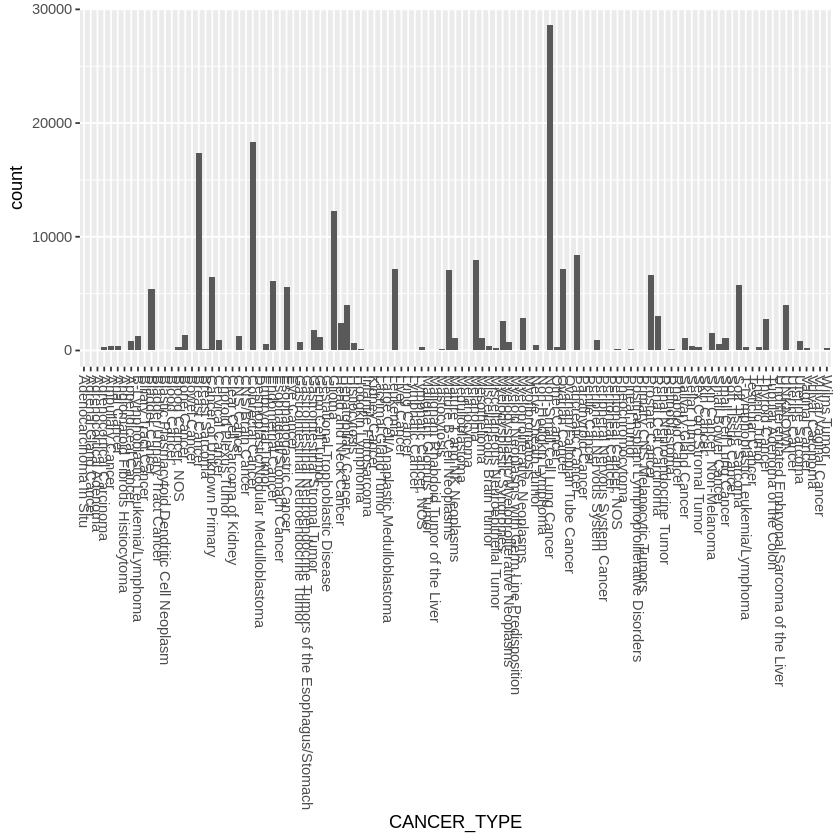

In [14]:
ggplot(full_table, aes(x=CANCER_TYPE)) + geom_bar() + scale_x_discrete(guide = guide_axis(angle = -90))

## Data Wrangling

I want the data to be represented in a uniform way. I want Other/Unknown and the like will be replaced with NA, and TRUE/True or FALSE/False will be only written in one way. For age, I want it as an integer, and therefore replace '<18' with 0 and '>89' with 100. I also want to rename the columns, but that is more of an asthetic preference. Finally, I want to create two new columns, one for 'Child'/'Young'/'Midlle_Aged'/'Old' and one in five year intervals.

### Reference table

In [15]:
colnames(full_table)[colnames(full_table) == 'PATIENT_ID'] <- 'patient_id'
colnames(full_table)[colnames(full_table) == 'SEX'] <- 'sex'
colnames(full_table)[colnames(full_table) == 'PRIMARY_RACE'] <- 'race'
colnames(full_table)[colnames(full_table) == 'CENTER'] <- 'center'
colnames(full_table)[colnames(full_table) == 'DEAD'] <- 'dead'
colnames(full_table)[colnames(full_table) == 'SAMPLE_ID'] <- 'sample_id'
colnames(full_table)[colnames(full_table) == 'AGE_AT_SEQ_REPORT'] <- 'age'
colnames(full_table)[colnames(full_table) == 'ONCOTREE_CODE'] <- 'oncotree_code'
colnames(full_table)[colnames(full_table) == 'SAMPLE_TYPE'] <- 'sample_type'
colnames(full_table)[colnames(full_table) == 'SEQ_ASSAY_ID'] <- 'sequence_assay_ID'
colnames(full_table)[colnames(full_table) == 'CANCER_TYPE'] <- 'cancer_type'
colnames(full_table)[colnames(full_table) == 'SAMPLE_TYPE_DETAILED'] <- 'sample_type_detail'

In [16]:
full_table <- full_table[c('patient_id',
                           'sex',
                           'race',
                           'center',
                           'dead',
                           'sample_id',
                           'age',
                           'oncotree_code',
                           'sample_type',
                           'sequence_assay_ID',
                           'cancer_type',
                           'sample_type_detail')]

### Sex

In [17]:
full_table['sex'][full_table['sex'] == 'Unknown'] <- NA
full_table['sex'][full_table['sex'] == 'Other'] <- NA
table(full_table['sex'])

sex
Female   Male 
104828  92313 

### Race

In [18]:
full_table['race'][full_table['race'] == 'Unknown'] <- NA
full_table['race'][full_table['race'] == 'Other'] <- NA
full_table['race'][full_table['race'] == 'Not Collected'] <- NA
full_table['race'][full_table['race'] == 'Not Applicable'] <- NA
table(full_table['race'])

race
           Asian            Black  Native American Pacific Islander 
           11530            11632              382              175 
           White 
          141117 

### Dead

In [19]:
full_table['dead'][full_table['dead'] == 'TRUE'] <- 'True'
full_table['dead'][full_table['dead'] == 'FALSE'] <- 'False'
full_table['dead'][full_table['dead'] == ''] <- NA
full_table['dead'][full_table['dead'] == 'Not Collected'] <- NA
full_table['dead'][full_table['dead'] == 'Not Released'] <- NA
full_table['dead'][full_table['dead'] == 'Unknown'] <- NA

In [20]:
table(full_table['dead'])

dead
 False   True 
113176  77715 

### Age

In [21]:
full_table['age'][full_table['age'] == '<18'] <- '0'
full_table['age'][full_table['age'] == '>89'] <- '100'
full_table['age'][full_table['age'] == 'Unknown'] <- NA

full_table$age <- as.integer(full_table$age) 

In [22]:
table(full_table['age'])

age
   0   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
5739    5 3146  429  387  403  420  394  446  514  561  555  639  676  729  836 
  32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47 
 869  962 1023 1107 1129 1245 1295 1353 1487 1526 1624 1760 1797 2062 2203 2273 
  48   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63 
2541 2800 2877 3237 3396 3570 3774 4126 4276 4425 4736 4864 5144 5230 5356 5430 
  64   65   66   67   68   69   70   71   72   73   74   75   76   77   78   79 
5626 5883 5917 5927 5838 5694 5552 5247 5169 5005 4645 4159 3830 3416 3135 2835 
  80   81   82   83   84   85   86   87   88  100 
2289 2018 1814 1490 1349 1025  881  654  515 1517 

### Oncotree Code

In [23]:
full_table['oncotree_code'][full_table['oncotree_code'] == 'UNKNOWN'] <- NA 

### Cancer type

In [24]:
full_table['cancer_type'][full_table['cancer_type'] == 'UNKNOWN'] <- NA

### Population

The centers where the data was collected are not all American, some are in Europe. Because of this, we add a column to our data that adds the short-hand AMR to Admixed American populations, for all centers, and then changes the population value to NFE (Non finish Europeans) for the centers in:
* NKI - Netherlands
* GRCC - France
* UHN - Canada
* CRUK - England
* VHIO - Spain

In [25]:
full_table['population'] <- 'AMR'
full_table['population'][full_table['center'] == 'NKI'] <- 'NFE'
full_table['population'][full_table['center'] == 'GRCC'] <- 'NFE'
full_table['population'][full_table['center'] == 'CRUK'] <- 'NFE'
full_table['population'][full_table['center'] == 'VHIO'] <- 'NFE'

### Age Group

In [26]:
full_table$age_group <- 'Child'
full_table$age_group[full_table$age>=18] <- 'Young'
full_table$age_group[full_table$age>=41] <- 'Middle Aged'
full_table$age_group[full_table$age>=65] <- 'Old'

table(full_table$age_group)


      Child Middle Aged         Old       Young 
       6979       84653       85804       20605 

### Age Interval

In [27]:
full_table$age_interval <- '<45'
full_table$age_interval[full_table$age>=45] <- '[45-55['
full_table$age_interval[full_table$age>=55] <- '[55-65['
full_table$age_interval[full_table$age>=65] <- '[65-75['
full_table$age_interval[full_table$age>=75] <- '>=70'

table(full_table$age_interval)


[45-55[ [55-65[ [65-75[     <45    >=70 
  28733   49213   54877   34291   30927 

In [28]:
head(full_table)

,patient_id,sex,race,center,dead,sample_id,age,oncotree_code,sample_type,sequence_assay_ID,cancer_type,sample_type_detail,population,age_group,age_interval
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GENIE-CHOP-C1002819,Female,White,CHOP,False,GENIE-CHOP-C1002819-BS79B4V9EZ,0,NA,Primary,CHOP-STNGS,NA,Primary tumor,AMR,Child,<45
2,GENIE-CHOP-C1002942,Female,White,CHOP,True,GENIE-CHOP-C1002942-BS7MEH2Z48,0,AML,Metastasis,CHOP-HEMEP,Leukemia,Local recurrence,AMR,Child,<45
3,GENIE-CHOP-C1002942,Female,White,CHOP,True,GENIE-CHOP-C1002942-BS3YSSSEPK,0,AML,Metastasis,CHOP-HEMEP,Leukemia,Local recurrence,AMR,Child,<45
4,GENIE-CHOP-C1003065,Male,White,CHOP,False,GENIE-CHOP-C1003065-BS66P79BWX,0,MBL,Primary,CHOP-STNGS,Embryonal Tumor,Primary tumor,AMR,Child,<45
5,GENIE-CHOP-C1003065,Male,White,CHOP,False,GENIE-CHOP-C1003065-BSTECFMMGC,0,MBL,Primary,CHOP-STNGS,Embryonal Tumor,Primary tumor,AMR,Child,<45
6,GENIE-CHOP-C1003188,Female,White,CHOP,False,GENIE-CHOP-C1003188-BSHKNH1HNP,0,MBL,Primary,CHOP-STNGS,Embryonal Tumor,Primary tumor,AMR,Child,<45


Warning message:
“Removed 1235 rows containing non-finite outside the scale range (`stat_boxplot()`).”
Warning message:
“Removed 65218 rows containing missing values or values outside the scale range (`stat_boxplot()`).”


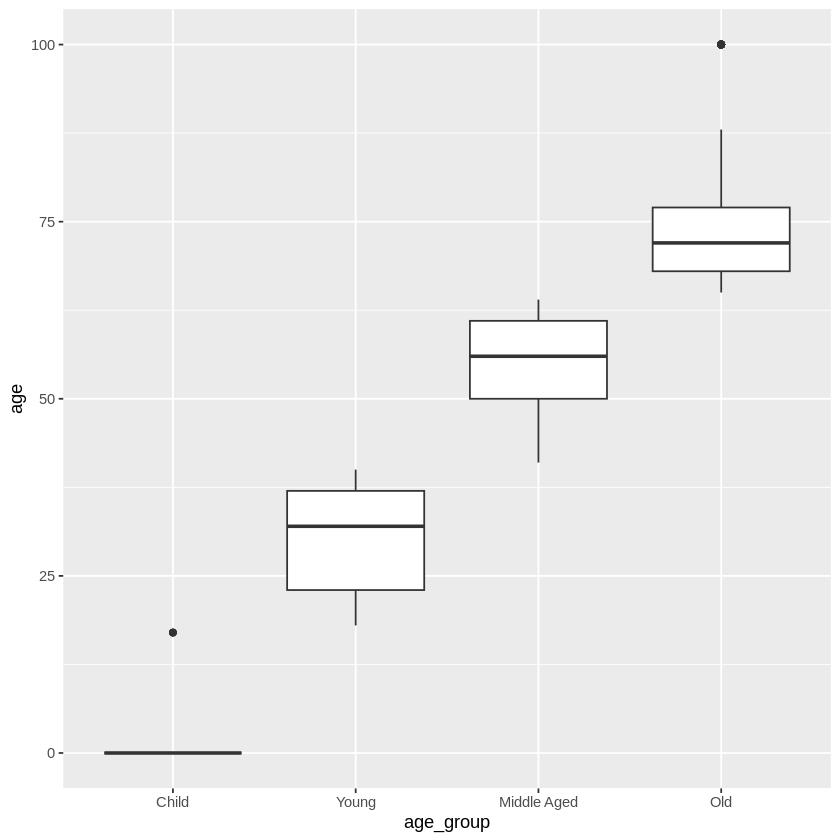

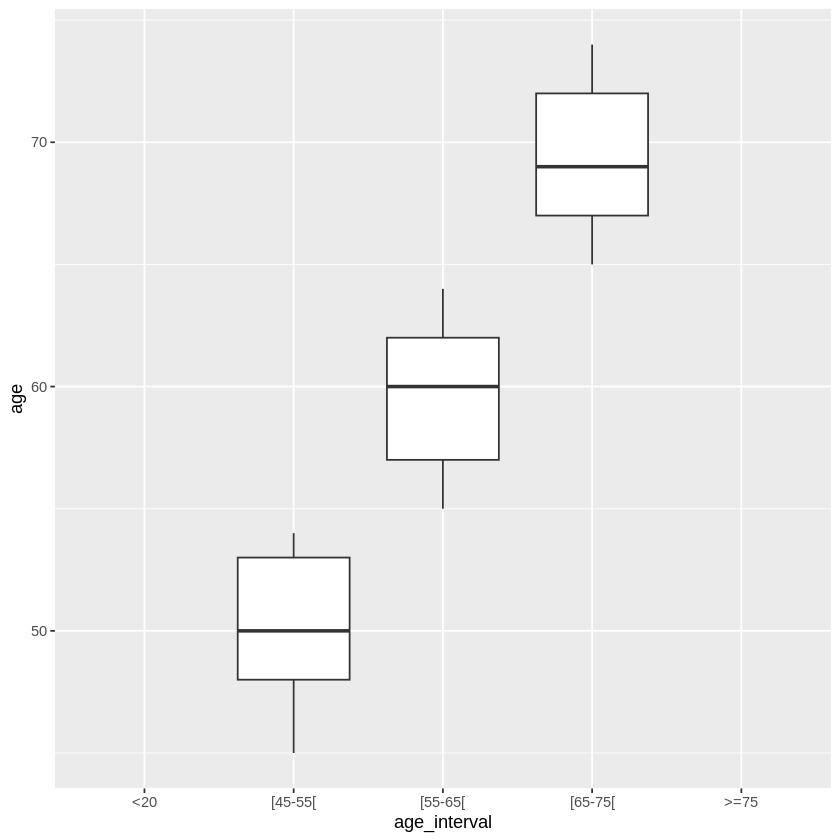

In [29]:
ggplot(full_table, aes(age_group, age)) + geom_boxplot() +
 scale_x_discrete(limits = c('Child', 'Young', 'Middle Aged', 'Old'))

ggplot(full_table, aes(age_interval, age)) + geom_boxplot() +
 scale_x_discrete(limits = c('<20','[45-55[','[55-65[','[65-75[','>=75'))

### NA

How many datapoints are left after removing NA from the sex column?

In [30]:
ref_table_no_na <- na.omit(full_table)

In [31]:
nrow(full_table)
length(unique(full_table$patient_id))

nrow(ref_table_no_na)
length(unique(ref_table_no_na$patient_id))

[1] 198041

[1] 172005

[1] 157017

[1] 135859

In [32]:
cancer_of_interest <- c('Bladder Cancer',
                        'Breast Cancer',
                        'Colorectal Cancer',
                        'Endometrial Cancer',
                        'Esophagogastric Cancer',
                        'Glioma',
                        'Head and Neck Cancer',
                        'Hepatobiliary Cancer',
                        'Mature B-Cell Neoplasms',
                        'Melanoma',
                        'Non-Small Cell Lung Cancer',
                        'Ovarian Cancer',
                        'Pancreatic Cancer',
                        'Prostate Cancer',
                        'Renal Cell Carcinoma',
                        'Soft Tissue Sarcoma',
                        'Thyroid Cancer')

sex_of_interest <- c('Female', 'Male')
sample_of_interest <- c('Primary', 'Metastasis')

In [33]:
test <- ref_table_no_na %>% filter(cancer_type %in% cancer_of_interest)
test <- test %>% filter(sex %in% sex_of_interest)
test <- test %>% filter(sample_type %in% sample_of_interest)

nrow(test)
length(unique(test$patient_id))

#test %>% group_by(cancer_type, sex, sample_type) %>% summarise(n=n())

#ref_table_no_na %>% filter(sex %in% sex_of_interest) %>% filter(sample_type %in% sample_of_interest) %>% group_by(sex, sample_type) %>% summarise(n=n())

[1] 109530

[1] 99536

In [34]:
# How many individuals in each cancer?
test <- ref_table_no_na
test <- test %>% filter(sex %in% sex_of_interest)
test <- test %>% filter(sample_type %in% sample_of_interest)

test2 <- test %>% group_by(cancer_type) %>% summarize(n = n_distinct(patient_id))

test2 %>% filter(n>=1500)

cancer_type,n
<chr>,<int>
Bladder Cancer,3827
Breast Cancer,10380
Cancer of Unknown Primary,3352
Colorectal Cancer,13011
Endometrial Cancer,4743
Esophagogastric Cancer,4035
Glioma,7666
Head and Neck Cancer,1757
Hepatobiliary Cancer,2861


In [38]:
test <- ref_table_no_na %>% filter(cancer_type == 'Mature B-Cell Neoplasms')
test <- test %>% filter(sex %in% sex_of_interest)
test <- test %>% filter(sample_type %in% sample_of_interest)

test %>% group_by(cancer_type, sex, sample_type) %>% summarize(n = n_distinct(patient_id))

`summarise()` has grouped output by 'cancer_type', 'sex'. You can override using the `.groups` argument.


cancer_type,sex,sample_type,n
<chr>,<chr>,<chr>,<int>
Mature B-Cell Neoplasms,Female,Metastasis,255
Mature B-Cell Neoplasms,Female,Primary,979
Mature B-Cell Neoplasms,Male,Metastasis,308
Mature B-Cell Neoplasms,Male,Primary,1378


In [36]:
# How many individuals in each group in the general dataset?
test <- ref_table_no_na
test <- test %>% filter(sex %in% sex_of_interest)
test <- test %>% filter(sample_type %in% sample_of_interest)

test %>% group_by(sex, sample_type) %>% summarize(n = n_distinct(patient_id))

`summarise()` has grouped output by 'sex'. You can override using the `.groups` argument.


sex,sample_type,n
<chr>,<chr>,<int>
Female,Metastasis,25543
Female,Primary,40772
Male,Metastasis,20304
Male,Primary,36989


# Results

We have created a clean dataframe containing 198.041 elements (172005 unique IDs). In the clean dataset we have limited our data to 15 columns:
* 'patient_id'
* 'sex'
* 'race'
* 'center'
* 'dead' (True/False/NA)
* 'sample_id'
* 'age'
* 'oncotree_code'
* 'sample_type'
* 'sequence_assay_ID'
* 'cancer_type'
* 'sample_type_detail'
* 'population'
* 'age_group'
* 'age_interval'

Sex had been limited to Female and Male and NA.
Race has been limited to White/Black/Asian/Native American/Pacific Islander/NA.
Dead has been re-formatted, so that all True/TRUE and False/FALSE are written as True and False. Dead is therefore limited to True/False/NA.
Age has been made an integer, with 0 and 100 representing <18 and >89, respectively.
Oncotree code and Cancer type have changed UNKNOWN to NA.
Two additional columns have been created. The first is called age_group and contains four age groups; Child, Young, Middle Aged and Old with individuals belonging to ages <18, 18-40, 41-64 or 65+, respectively. The other new column is called age_interval and contains five-year intervals from <20 to >=90, with individual ages matching herein.

If we remove all rows containing one NA or more, there remaines 157.017 elements (135.859 unique IDs).

We will now save both of these tables as comma seperated files.

In [37]:
write.csv(full_table, "../../derived_data/genie_v15/clean_reference.csv", row.names=TRUE)
write.csv(ref_table_no_na, "../../derived_data/genie_v15/filtered_reference.csv", row.names=TRUE)